In [4]:

# CLASSIFY IRIS. CLASSIFICA L'EXEMPLE BASIC D'IRIS SETOSA AMB ELS SEGÜENTS ALGORITMES DE CLASSIFICACIO
# K-Nearest-Neighbour
# Naive Bayes Classificator
# Regressió Logística
# Support Vector Machine
# Arbres de Decisió
# Random Forests
# Multi-Layer Perceptron (proto - Xarxa Neuronal)

# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow
import argparse

#inicia el servidor mlflow
# Abans d'executar, executar la comanda mlflow ui
#mlflow.end_run()

mlflow.start_run(run_name='Exemple Iris')
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.sklearn.autolog()

#Seleccionar el model
print("Select model: knn, naive_bayes, logit, svm, decision_tree, random_forest, mlp")
modelsel = input()

# Defineix el diccionari de models.
# Cada model cridarà a una funció diferent del sklearn
# fa l'equivalent a un switch
models = {
	"knn": KNeighborsClassifier(n_neighbors=1),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	#Explicació de svm a:  https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
	# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
	"svm": SVC(kernel="rbf", gamma="auto"),
	"decision_tree": DecisionTreeClassifier(),
	# n_estimators -> són el número d'arbres a votar
	"random_forest": RandomForestClassifier(n_estimators=100),
	"mlp": MLPClassifier()
}

# Carrega el dataset d'Iris i el divideix en dos datasets aleatoriament
# Fa servir 3/4 per training i 1/4 per avaluació
#TRAINING  Tu le dices al programa. Eh, que ese punto es una setosa.
#EVALUACION  Le das un punto y que el programa te diga que es. Luego evaluas si lo ha hecho bien o no.
print("[INFO] loading data...")
dataset = load_iris()
(trainX, testX, trainY, testY) = train_test_split(dataset.data,
	dataset.target, random_state=3, test_size=0.25)

mlflow.log_param("dataset_size", len(dataset.data))
mlflow.log_param("test_size", 0.25)
mlflow.log_param("random_state", 3)

print(dataset.data[0])
print(dataset.target)

# Entrena el model amb el dataset de 75%
print("[INFO] using '"+modelsel+"' model")
model = models[modelsel]
# Log dels paràmetres específics del model abans de l'entrenament
if modelsel == "knn":
    mlflow.log_param("n_neighbors", 1)
elif modelsel == "logit":
    mlflow.log_param("solver", "lbfgs")
    mlflow.log_param("multi_class", "auto")
elif modelsel == "svm":
    mlflow.log_param("kernel", "rbf")
    mlflow.log_param("gamma", "auto")
elif modelsel == "random_forest":
    mlflow.log_param("n_estimators", 100)

model.fit(trainX, trainY)
mlflow.sklearn.log_model(model, 'model_explicit')
# Fa prediccions sobre el model d'avaluació i mostra els resultats
print("[INFO] evaluating train cases...")
predictions = model.predict(trainX)


classification_rep_train = classification_report(trainY, predictions,
	target_names=dataset.target_names)
print(classification_rep_train)
mlflow.set_tag("classification_report train", classification_rep_train)

print("[INFO] evaluating...")
predictions = model.predict(testX)
classification_rep_test = classification_report(testY, predictions,
	target_names=dataset.target_names)
print(classification_rep_test)

mlflow.set_tag("classification_report test", classification_rep_test)

with open("classification_report_train.txt", "w") as f:
    f.write(classification_rep_train)

mlflow.log_artifact("classification_report_train.txt")

with open("classification_report_test.txt", "w") as f:
    f.write(classification_rep_test)

mlflow.log_artifact("classification_report_test.txt")


# Resultat de les mètriques
mlflow.log_metrics({
    "accuracy": accuracy_score(testY, predictions),
    "precision": precision_score(testY, predictions, average="weighted"),
    "recall": recall_score(testY, predictions, average="weighted"),
    "f1_score": f1_score(testY, predictions, average="weighted")
})

#precision: Que hi hagi pocs falsos positius.
#per exemple: Si he dit que 50 plantes son setosa, i d'aquestes ho eran 45. La precisió es 90%

#recall: Que hi hagi pocs falsos negatius.
#per exemple: Si en el model hi havien 100 setoses i jo he dit que 50 ho eren, el recall es 50%



#f1score es la mitja. (mes o menys)

#precisio. He dit que hi havien 92. I els 92 ho eren. 100% precisio. 0 falsos positius
#No obstant, en realitat n'hi havien 100, aixi que tinc 8 falsos negatius. 92% recall

#He dit que hi havien 108. D'aquests 108 només 100 ho eren. 92% precisió. 8 falsos positius.
#No obstant, els 100 que hi havien els he detectat correctament. 0 falsos negatius. 100% recall.


2024/01/23 18:26:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


Select model: knn, naive_bayes, logit, svm, decision_tree, random_forest, mlp
[INFO] loading data...
[5.1 3.5 1.4 0.2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[INFO] using 'decision_tree' model


2024/01/23 18:27:42 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID c5e704a6c85849178236ba7539e8e36a. Failed operations: [MlflowException("API request to http://127.0.0.1:5000/api/2.0/mlflow/runs/log-batch failed with exception HTTPConnectionPool(host=\'127.0.0.1\', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/log-batch (Caused by ResponseError(\'too many 500 error responses\'))")]')]


[INFO] evaluating train cases...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       1.00      1.00      1.00        38
   virginica       1.00      1.00      1.00        39

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

[INFO] evaluating...
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.92      0.96        12
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38


D:\ProjectesPycharm\Introduccio\pythonProject\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\ProjectesPycharm\Introduccio\pythonProject\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\ProjectesPycharm\Introduccio\pythonProject\.venv\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

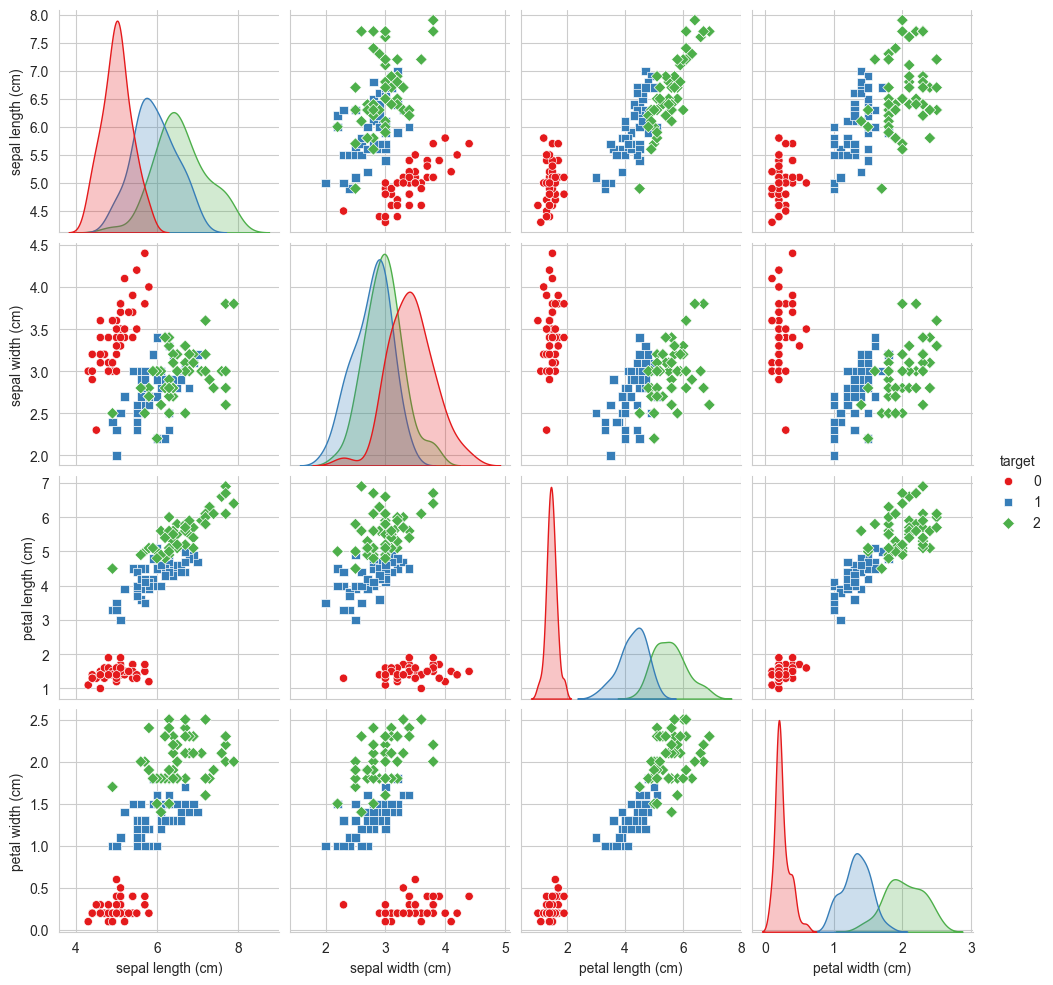

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris_df['target'] = dataset.target

# Dibuixa gràfics de dispersió per a parelles de característiques
sns.pairplot(iris_df, hue='target', palette='Set1', markers=["o", "s", "D"])
plt.show()

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(testY, predictions);
#disp.plot()

# Guarda la matriu de confusió com a imatge (PNG, per exemple)
plt.savefig("confusion_matrix.png")

# Emmagatzema la matriu de confusió com un artifact a MLflow

mlflow.log_artifact("confusion_matrix.png")




In [7]:
if modelsel == "decision_tree":
    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(model, filled=True, feature_names=dataset.feature_names, class_names=dataset.target_names)
    plt.title("Decision Tree Classifier for Iris Dataset")
    # Guardar la figura localment
    local_path = "decision_tree_plot.png"
    plt.savefig(local_path)

    plt.show()

    # Log de la figura a MLFlow
    mlflow.log_artifact(local_path)

In [8]:
mlflow.end_run()